# Global Superstore project


In [46]:
# import ptyhon Modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Load the Data - Global Superstore project 
dataset = pd.read_csv("C:\\Users\\ganes\\Downloads\\global_superstore.csv")

In [5]:
# create data frame
data = pd.DataFrame(dataset)

Data exploration : 

In [6]:
# check no of rows and columns 
data.shape

(51290, 24)

In [7]:
# check names of columns 
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [11]:
# check for index 
data.index

RangeIndex(start=0, stop=51290, step=1)

In [14]:
# check information of data like count of values in each column and it's data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

Cleaning Data :

In [55]:
# let's change data type as per data:  Data Type Conversion:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [27]:
# check for unique values
data.count()

Row ID            51290
Order ID          51290
Order Date        51290
Ship Date         51290
Ship Mode         51290
Customer ID       51290
Customer Name     51290
Segment           51290
Postal Code        9994
City              51290
State             51290
Country           51290
Region            51290
Market            51290
Product ID        51290
Category          51290
Sub-Category      51290
Product Name      51290
Sales             51290
Quantity          51290
Discount          51290
Profit            51290
Shipping Cost     51290
Order Priority    51290
dtype: int64

In [29]:
# Handling Missing Values: drop column postal code
data.drop(['Postal Code'], axis = 1, inplace = True, )

In [32]:
# check for null values:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

<h2> Analyze data using sql : </h2>

pip install  pandasql 


In [22]:
import pandasql as psql

df = pd.DataFrame(data)

result = psql.sqldf("SELECT * FROM df limit 2")
result

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11-11-2014,11-13-2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,Novimex Executive Leather Armchair Black,3709.39,9,0.1,-288.77,923.63,Critical


In [21]:
# Top-Selling Products:
query = """

SELECT "Product Name", SUM(Sales) AS TotalSales

FROM df

GROUP BY "Product Name"

ORDER BY TotalSales DESC

LIMIT 10;

"""

result = psql. sqldf(query)
result

,Product Name,TotalSales
0,Apple Smart Phone Full Size,86935.79
1,Cisco Smart Phone Full Size,76441.53
2,Motorola Smart Phone Full Size,73156.32
3,Nokia Smart Phone Full Size,71904.56
4,Canon imageCLASS 2200 Advanced Copier,61599.83
5,Hon Executive Leather Armchair Adjustable,58193.51
6,Office Star Executive Leather Armchair Adjustable,50661.68
7,Harbour Creations Executive Leather Armchair A...,50121.52
8,Samsung Smart Phone Cordless,48653.46
9,Nokia Smart Phone with Caller ID,47877.80


In [27]:
# Sales Performance by Region: 
query = """
SELECT Region, SUM(Sales) AS TotalSales
FROM df
GROUP BY Region
ORDER BY TotalSales DESC
LIMIT 5;
"""
result = psql.sqldf(query)
result

,Region,TotalSales
0,Western Europe,1731930.39
1,Central America,1223100.79
2,Oceania,1100185.03
3,Southeastern Asia,884423.75
4,Southern Asia,866572.89


In [36]:
# Customer Purchasing Behavior:
query = """
SELECT "Customer Name", COUNT("OrderID") AS NumberOfOrders, SUM(Sales) AS TotalSales
FROM df
GROUP BY "Customer Name"
ORDER BY TotalSales DESC
LIMIT 10;"""
result = psql.sqldf(query)
result

,Customer Name,NumberOfOrders,TotalSales
0,Tom Ashbrook,80,40488.09
1,Tamara Chand,88,37457.33
2,Greg Tran,87,35550.95
3,Christopher Conant,73,35187.08
4,Sean Miller,50,35170.96
5,Bart Watters,96,32310.45
6,Natalie Fritzler,95,31781.29
7,Fred Hopkins,82,30400.69
8,Jane Waco,75,30288.46
9,Hunter Lopez,53,30243.59


# Data Visualization using matplotlib and seaborn module of python

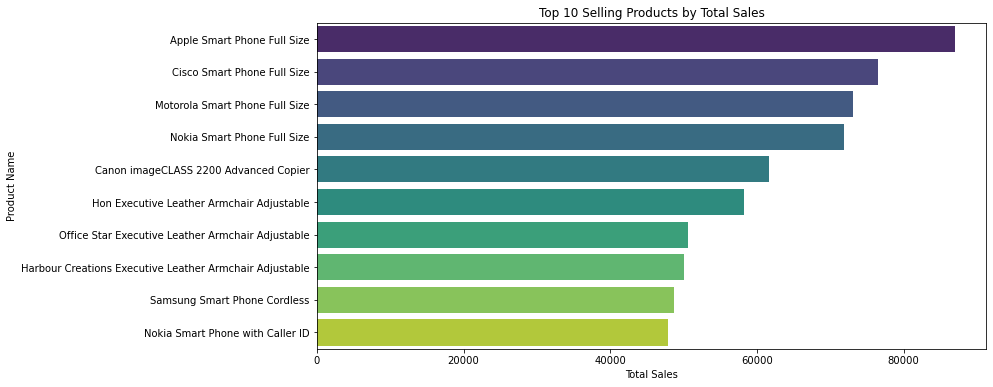

In [47]:
# Top-Selling Products

top_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.values, y=top_selling_products.index, palette="viridis")
plt.title('Top 10 Selling Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

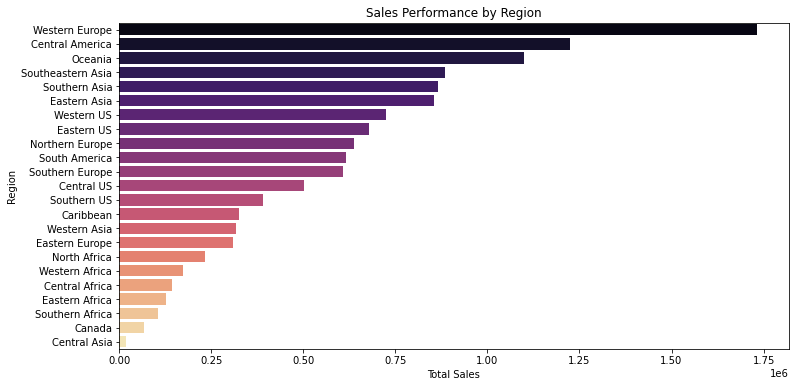

In [48]:
# Sales Performance by Region
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette="magma")
plt.title('Sales Performance by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

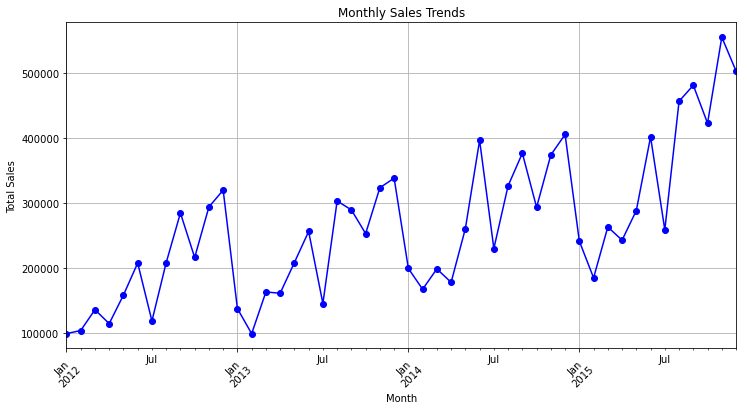

In [65]:
# Monthly Sales Trends
monthly_sales_trends = df.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales_trends.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

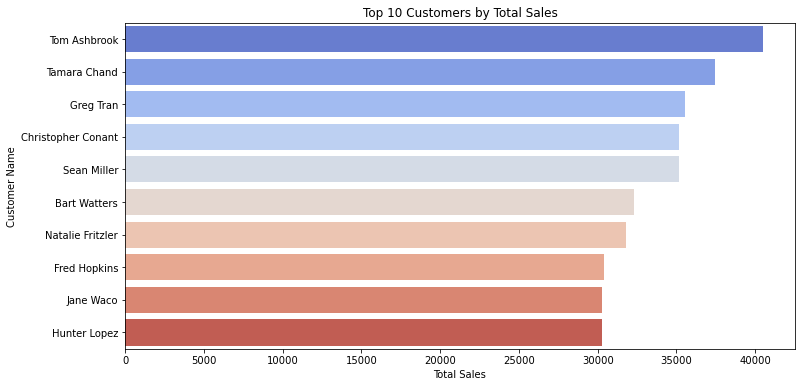

In [66]:
# Customer Purchasing Behavior
customer_purchasing_behavior = df.groupby('Customer Name').agg({'Order ID': 'count', 'Sales': 'sum'}).sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=customer_purchasing_behavior['Sales'], y=customer_purchasing_behavior.index, palette="coolwarm")
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()

Conclusion
Summary of Findings:

Identified top 10 products by total sales.
Regions with the highest and lowest sales performance.
Monthly sales trends showed peak sales in certain months.
Top customers contributed significantly to total sales.

Recommendations:

Focus marketing efforts on top-selling products and high-performing regions.
Investigate reasons for low sales in certain regions and develop strategies to improve.
Leverage peak sales months for promotional activities.

Future Work:

Conduct more detailed analysis on customer segmentation.
Integrate additional data sources for a more comprehensive analysis.